In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

**Dataset**

In [2]:
datasetPath = os.path.join("dataset","winequality-white.csv")
dataset = pd.read_csv(datasetPath,";")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
len(dataset)

4898

**Data Exploration**
Target variable exploration

In [5]:
qualityMin = min(dataset['quality'])
qualityMax = max(dataset['quality'])
print(f"Min quality: {qualityMin}")
print(f"Max quality: {qualityMax}")
n_bins = list(range(qualityMin,qualityMax+1))

Min quality: 3
Max quality: 9


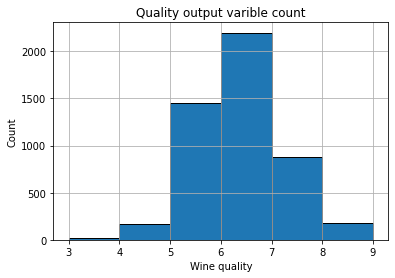

In [6]:
plt.figure()
plt.title("Quality output varible count")
plt.hist(dataset["quality"], n_bins, edgecolor= "black")
plt.xlabel("Wine quality")
plt.ylabel("Count")
plt.grid()
plt.savefig("./images/wineQuality.png")
plt.show()

**Feature Exploration**

In [7]:
for i in n_bins:
    print(f"Quality {i} wines: {len(dataset.loc[dataset['quality']==i])}")

Quality 3 wines: 20
Quality 4 wines: 163
Quality 5 wines: 1457
Quality 6 wines: 2198
Quality 7 wines: 880
Quality 8 wines: 175
Quality 9 wines: 5


In [8]:
feature_names = list(dataset.columns)[:-1] # delete quality

PCA Exploration

In [9]:
pca = PCA(n_components=2)
x_new = pca.fit_transform(dataset[feature_names])

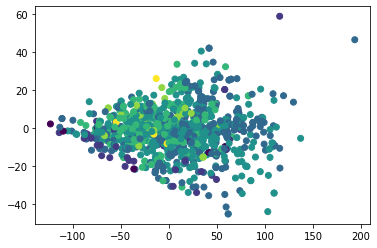

In [10]:
points = 1000
plt.scatter(x_new[:points,0],x_new[:points,1],c=dataset["quality"][:points])


Feature Distribution

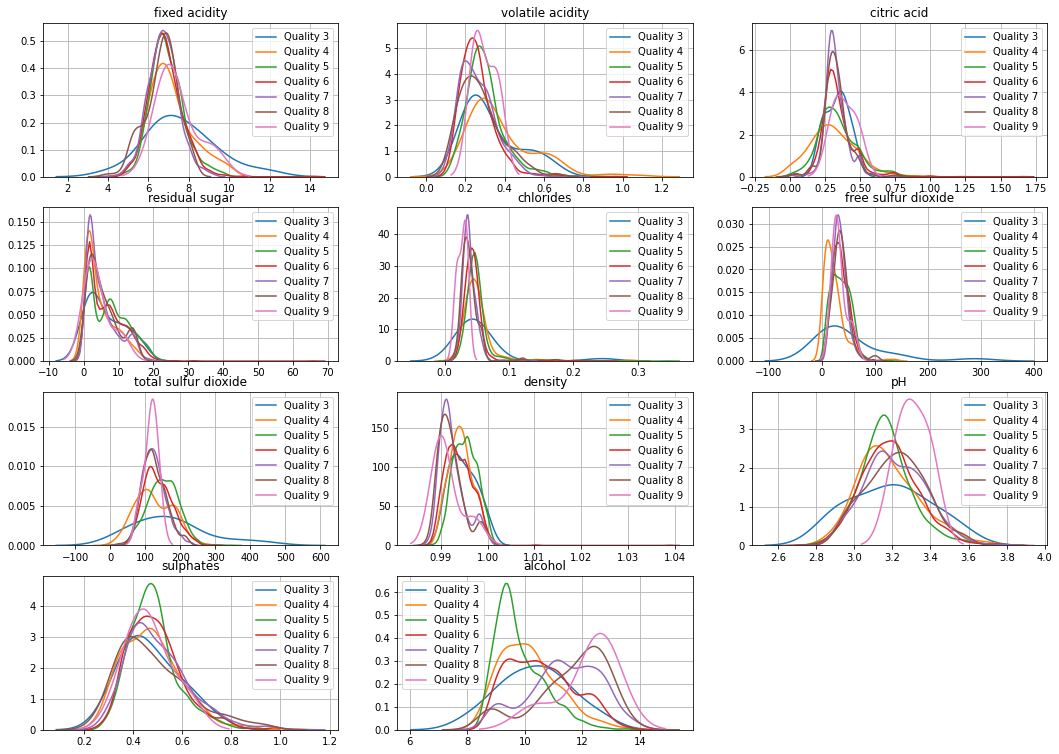

In [11]:
plt.figure(figsize=(18,13))

for i,feature in enumerate(feature_names):
    # plt.figure()
    plt.subplot(4,3,i+1)
    plt.grid()
    plt.title(feature)
    for j in n_bins:   
        sns.kdeplot(dataset.loc[dataset["quality"]==j, feature], label= f"Quality {j}", kernel="gau")

plt.savefig("./images/featureDistributions.png")
    

**Standardization**

In [12]:
dsNorm = dataset.copy()
for i, feature in enumerate(feature_names):
    dsNorm[[feature]] = ss(with_mean=True, with_std=True).fit_transform(dsNorm[[feature]]) 

In [13]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
dsNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


**Correlation Matrix**

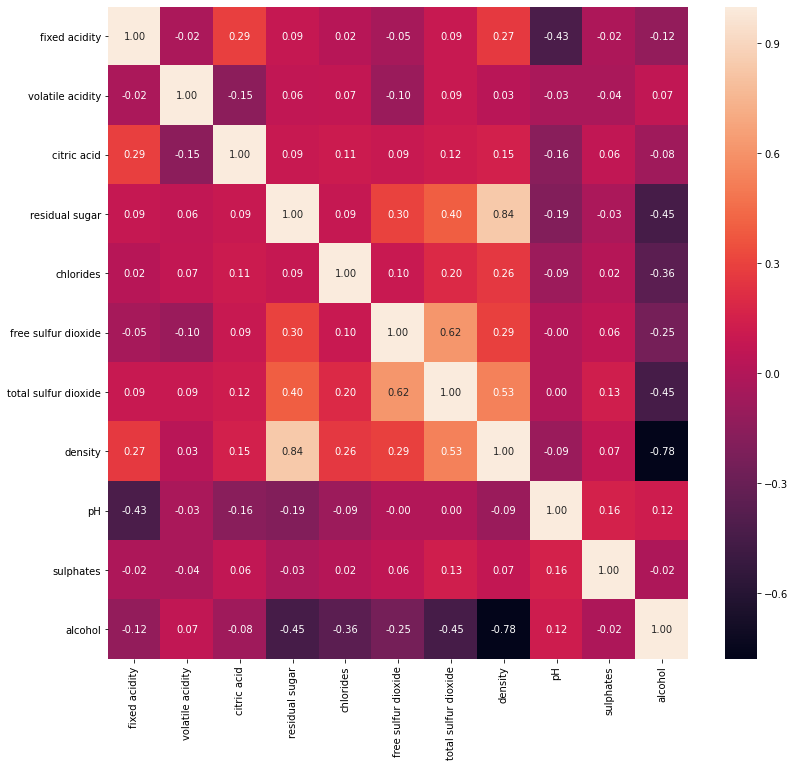

In [20]:
plt.figure(figsize=(13,12))
sns.heatmap(dsNorm[feature_names].corr("pearson"), annot=True, fmt=".2f")
plt.savefig("./images/correlationMatrix.png")

Given a threshold of +-0.40 there are a lot of correlated features:
 1. alcohol and density 
 2. residual sugar and density
 3. residual sugar and alchool
 4. alchol and total sulfer dioxide
 5. pH and fixed acidity
 6. density and total total sulfer dioxide
 7. total sulfur dioxide and free sulfur dioxide
 8. total sulfur dioxide and residul sugar

 Given a threshold of +-0.50 there are a lot of correlated features:
 1. total sulfur dioxide and free sulfur dioxide
 2. density and residul sugar
 3. density and total sulfure dioxide
 4. alcohol and density

 -> drop density and free sulfur dioxide

 important:
 1. sulphates
 2. alcohol 
 3. residual sugar
 4. citric acid 
 5. total sulfur dioxide



In [16]:
# vipFeatures = ["sulphates","alcohol","residual sugar","citric acid","total sulfur dioxide"]
noCorrFeatures = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
dsNorm[noCorrFeatures].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.744565,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-0.149685,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.973336,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,1.121091,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,1.121091,0.011480,-0.787342,-0.499203


In [17]:
dsNorm["quality"].shape

(4898,)

**Model Validation**

Holdout method

In [18]:
x_train, x_test, y_train, y_test = train_test_split(dsNorm[noCorrFeatures], dsNorm["quality"], train_size = 0.75, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.75, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3673, 9)
(918, 9)
(307, 9)


**Class Imbalance: Random Oversampling**

In [20]:
trainSet, testSet = train_test_split(dsNorm, train_size = 0.75, random_state=42)
valSet, testSet = train_test_split(testSet, train_size = 0.75, random_state=42)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==3])
newSamples = trainSet[trainSet.quality==3].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSet.append(newSamples)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==4])
newSamples = trainSet[trainSet.quality==4].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSetOS.append(newSamples)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==5])
newSamples = trainSet[trainSet.quality==5].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSetOS.append(newSamples)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==7])
newSamples = trainSet[trainSet.quality==7].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSetOS.append(newSamples)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==8])
newSamples = trainSet[trainSet.quality==8].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSetOS.append(newSamples)

sampleNumber = len(trainSet[trainSet.quality==6]) - len(trainSet[trainSet.quality==9])
newSamples = trainSet[trainSet.quality==9].sample(sampleNumber, replace=True, random_state=42)
trainSetOS = trainSetOS.append(newSamples)

trainSetOS = shuffle(trainSetOS, random_state=42)

trainSetOS = trainSetOS[noCorrFeatures + ["quality"]]
valSet = valSet[noCorrFeatures + ["quality"]]
testSet = testSet[noCorrFeatures + ["quality"]]

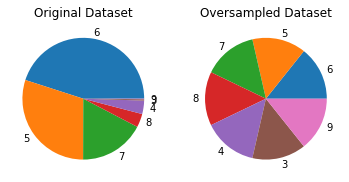

In [21]:
labels= ["6","5","7","8","4","3","9"]

plt.figure()
plt.subplot(1,2,1)
plt.title("Original Dataset")
plt.pie(trainSet["quality"].value_counts(), labels=labels)
# plt.legend()
plt.subplot(1,2,2)
plt.title("Oversampled Dataset")
plt.pie(trainSetOS["quality"].value_counts(), labels=labels)
# plt.legend()
plt.savefig("./images/classImbalance.png")

**Model Selection**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import time

In [24]:
classifierNames = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "SVC linear",
    "SVC",
    "KNeighborsClassifier",
    "GaussianNB"
    ]
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(kernel="linear", random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier()
]

for clfName, clf in zip(classifierNames,classifiers):
    t0 = time.time()
    clf.fit(x_train, y_train)
    t1 = time.time()
    y_pred = clf.predict(x_val)
    
    print(clfName)
    print(f"\tAccuracy: {accuracy_score(y_val,y_pred)}. Train time: {round(t1-t0,2)} sec")


DecisionTreeClassifier
	Accuracy: 0.5893246187363834. Train time: 0.1 sec
RandomForestClassifier
	Accuracy: 0.6775599128540305. Train time: 2.07 sec
AdaBoostClassifier
	Accuracy: 0.3420479302832244. Train time: 0.56 sec
SVC linear
	Accuracy: 0.49782135076252726. Train time: 1.13 sec
SVC
	Accuracy: 0.5403050108932462. Train time: 1.68 sec
KNeighborsClassifier
	Accuracy: 0.5315904139433552. Train time: 0.01 sec


Random Forest Classifier and SVM seem to be the best option to invest on, so Model Tuning will be done on them

**Model Tuning On original dataset**

Support Vector Machine Model Tuning: Holdout

In [31]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

holdoutResult = {"acc":0,"gamma":None,"c":None}
for g in g_values:
    for c in c_values:
        svm = SVC(C=c,gamma=g, random_state=42)
        svm.fit(x_train, y_train)
        y_pred = svm.predict(x_val)
        acc = accuracy_score(y_val,y_pred)
        if holdoutResult["acc"] < acc:
            holdoutResult["acc"] = acc
            holdoutResult["gamma"] = g
            holdoutResult["c"] = c

print(f'Best Parameters: Gamma = {holdoutResult["gamma"]}, C = {holdoutResult["c"]}, Validation Accuracy = {holdoutResult["acc"]}')
bestSvm = SVC(C=holdoutResult["c"], gamma=holdoutResult["gamma"], random_state=42)
bestSvm.fit(x_train, y_train)
y_pred = bestSvm.predict(x_test)
testAcc = accuracy_score(y_test, y_pred)
print(f"Test accuracy of the best model: {testAcc}")

Best Parameters: Gamma = 1, C = 10, Validation Accuracy = 0.6350762527233116
Test accuracy of the best model: 0.6416938110749185


Support Vector Machine Model Tuning: K-Fold

In [30]:
parameters = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
clf = GridSearchCV(estimator=SVC(random_state=42), param_grid=parameters, scoring="accuracy", n_jobs=4)
clf.fit(dsNorm[noCorrFeatures], dsNorm["quality"])

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
result = pd.DataFrame.from_dict(clf.cv_results_)
print(result.loc[result.rank_test_score==1]["params"])
print(result.loc[result.rank_test_score==1]["mean_test_score"])

37    {'C': 100, 'gamma': 0.01}
Name: params, dtype: object
37    0.53247
Name: mean_test_score, dtype: float64


In [44]:
x_trainBest, x_testBest, y_trainBest, y_testBest = train_test_split(dsNorm[noCorrFeatures], dsNorm["quality"], train_size = 0.75, random_state=42)

In [48]:
bestSvmKFOriginal = SVC(random_state=42, C=100, gamma=0.01)
bestSvmKFOriginal.fit(x_trainBest, y_trainBest)
y_pred = bestSvmKFOriginal.predict(x_testBest)
test_accRfOs = accuracy_score(y_testBest, y_pred)
print(f"SVM Model K-Fold test accuracy: {test_accRfOs}")

SVM Model K-Fold test accuracy: 0.5330612244897959


Ramdom Forest Model Tuning: Holdout

In [32]:
depth = list(range(1, 20))
nTrees = [5, 10, 20, 50, 100, 150, 200]

holdoutResult = {"acc":0,"nTrees":None,"depth":None}
for n in nTrees:
    for d in depth:
        tree = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        tree.fit(x_train, y_train)
        y_pred = tree.predict(x_val)
        acc = accuracy_score(y_val,y_pred)
        if holdoutResult["acc"] < acc:
            holdoutResult["acc"] = acc
            holdoutResult["nTrees"] = n
            holdoutResult["depth"] = d 

print(f'Best Parameters: Trees number = {holdoutResult["nTrees"]}, Depth = {holdoutResult["depth"]}, Accuracy = {holdoutResult["acc"]}')
bestTree = RandomForestClassifier(n_estimators=holdoutResult["nTrees"], max_depth=holdoutResult["depth"], random_state=42)
bestTree.fit(x_train, y_train)
y_pred = bestTree.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy of the best model: {test_acc}")

Best Parameters: Trees number = 100, Depth = 17, Accuracy = 0.6830065359477124
Test accuracy of the best model: 0.6938110749185668


Random Forest Model Tuning: K-Fold

In [33]:
parameters = {
    "max_depth": list(range(1, 20)),
    "n_estimators": [5, 10, 20, 50, 100, 150, 200]
}
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=parameters, scoring="accuracy", n_jobs=4)
clf.fit(dsNorm[noCorrFeatures], dsNorm["quality"])

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [34]:
result = pd.DataFrame.from_dict(clf.cv_results_)
print(result.loc[result.rank_test_score==1]["params"])
print(result.loc[result.rank_test_score==1]["mean_test_score"])

69    {'max_depth': 10, 'n_estimators': 200}
Name: params, dtype: object
69    0.534101
Name: mean_test_score, dtype: float64


In [47]:
bestRf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=200)
bestRf.fit(x_trainBest, y_trainBest)
y_pred = bestRf.predict(x_testBest)
test_accRfOs = accuracy_score(y_testBest, y_pred)
print(f"Random Forest Model K-Fold test accuracy: {test_accRfOs}")

Random Forest Model K-Fold test accuracy: 0.6244897959183674


**Model Tuning Over sampled Dataset**

In [25]:
classifierNames = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "SVC linear",
    "SVC",
    "KNeighborsClassifier"
    ]
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(kernel="linear", random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier()
]

for clfName, clf in zip(classifierNames,classifiers):
    t0 = time.time()
    clf.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])
    t1 = time.time()
    y_pred = clf.predict(valSet[noCorrFeatures])
    
    print(clfName)
    print(f"\tAccuracy: {accuracy_score(valSet['quality'],y_pred)}. Train time: {round(t1-t0,2)} sec")

DecisionTreeClassifier
	Accuracy: 0.5969498910675382. Train time: 0.12 sec
RandomForestClassifier
	Accuracy: 0.6699346405228758. Train time: 2.79 sec
AdaBoostClassifier
	Accuracy: 0.3464052287581699. Train time: 1.0 sec
SVC linear
	Accuracy: 0.3115468409586057. Train time: 14.29 sec
SVC
	Accuracy: 0.4324618736383442. Train time: 7.09 sec
KNeighborsClassifier
	Accuracy: 0.5239651416122004. Train time: 0.03 sec


Ramdom Forest Model Tuning: Holdout, over sampled

In [26]:
depth = list(range(1, 20))
nTrees = [5, 10, 20, 50, 100, 150, 200]

holdoutResult = {"acc":0,"nTrees":None,"depth":None}
for n in nTrees:
    for d in depth:
        tree = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        tree.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])
        y_pred = tree.predict(valSet[noCorrFeatures])
        acc = accuracy_score(valSet['quality'],y_pred)
        if holdoutResult["acc"] < acc:
            holdoutResult["acc"] = acc
            holdoutResult["nTrees"] = n
            holdoutResult["depth"] = d 

print(f'Best Parameters: Trees number = {holdoutResult["nTrees"]}, Depth = {holdoutResult["depth"]}, Validation Accuracy = {holdoutResult["acc"]}')
bestTree = RandomForestClassifier(n_estimators=holdoutResult["nTrees"], max_depth=holdoutResult["depth"], random_state=42)
bestTree.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])
y_pred = bestTree.predict(testSet[noCorrFeatures])
test_acc = accuracy_score(testSet["quality"], y_pred)
print(f"Test accuracy of the best model: {test_acc}")

Best Parameters: Trees number = 200, Depth = 19, Validation Accuracy = 0.6775599128540305
Test accuracy of the best model: 0.6970684039087948


Ramdom Forest Model Tuning: K-Fold, over sampled

In [27]:
parameters = {
    "max_depth": list(range(1, 20)),
    "n_estimators": [5, 10, 20, 50, 100, 150, 200]
}
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=parameters, scoring="accuracy", n_jobs=4)
clf.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])

result = pd.DataFrame.from_dict(clf.cv_results_)
print("Results:")
print(result.loc[result.rank_test_score==1]["params"])
print(result.loc[result.rank_test_score==1]["mean_test_score"])

Results:
132    {'max_depth': 19, 'n_estimators': 200}
Name: params, dtype: object
132    0.928572
Name: mean_test_score, dtype: float64


In [43]:
bestRfOs = RandomForestClassifier(random_state=42, max_depth=19, n_estimators=200)
bestRfOs.fit(trainSetOS[noCorrFeatures],trainSetOS["quality"])
y_pred = bestRfOs.predict(testSet[noCorrFeatures])
test_accRfOs = accuracy_score(testSet['quality'], y_pred)
print(f"Random Forest Model K-Fold Oversampled test accuracy: {test_accRfOs}")

Random Forest Model K-Fold Oversampled test accuracy: 0.6970684039087948


KNeighbors Model tuning: Holdout, oversampled 

In [30]:
nNeigh = [5, 10, 20, 50]
Ps = [2, 3, 4, 5]

holdoutResult = {"acc":0,"nNeigh":None,"P":None}
for n in nNeigh:
    for p in Ps:
        knn = KNeighborsClassifier(n_neighbors=n, p=p)  # It is not random, so no random_state
        knn.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])
        y_pred = knn.predict(valSet[noCorrFeatures])
        acc = accuracy_score(valSet['quality'],y_pred)
        if holdoutResult["acc"] < acc:
            holdoutResult["acc"] = acc
            holdoutResult["nNeigh"] = n
            holdoutResult["P"] = p

print(f'Best Parameters: Neighbors number = {holdoutResult["nNeigh"]}, P = {holdoutResult["P"]}, Val Accuracy = {holdoutResult["acc"]}')
knn = KNeighborsClassifier(n_neighbors=holdoutResult["nNeigh"], p=holdoutResult["P"])  
knn.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"])
y_pred = knn.predict(testSet[noCorrFeatures])
testAcc = accuracy_score(testSet['quality'], y_pred)
print(f"Test accuracy of the best model: {testAcc}")

Best Parameters: Neighbors number = 5, P = 2, Val Accuracy = 0.5239651416122004
Test accuracy of the best model: 0.5504885993485342


KNeighbors Model tuning: K-fold, oversampled 

In [31]:
parameters = {
    "n_neighbors": [5, 10, 20, 50],
    "p": [2, 3, 4, 5]
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, scoring="accuracy", n_jobs=4) # use the default 5-fold cross validation
clf.fit(trainSetOS[noCorrFeatures], trainSetOS["quality"]) # Forse dovrei passare tutto il dataset?

result = pd.DataFrame.from_dict(clf.cv_results_)
print("Results:")
print(result.loc[result.rank_test_score==1]["params"])
print(result.loc[result.rank_test_score==1]["mean_test_score"])

Results:
1    {'n_neighbors': 5, 'p': 3}
Name: params, dtype: object
1    0.830195
Name: mean_test_score, dtype: float64


In [42]:
bestKnOs = KNeighborsClassifier(n_neighbors=5, p=3)
bestKnOs.fit(trainSetOS[noCorrFeatures],trainSetOS["quality"])
y_pred = bestKnOs.predict(testSet[noCorrFeatures])
test_accKnOs = accuracy_score(testSet['quality'], y_pred)
print(f"KNeighbors Model K-Fold Oversampled test accuracy: {test_accKnOs}")

KNeighbors Model K-Fold Oversampled test accuracy: 0.5700325732899023
